In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 导入Brent原油价格预测数据
brent_forecast = pd.read_csv('data_output_auto/Brent原油价格_未来月度预测.csv')
brent_forecast

,Date,Brent原油价格_预测
0,2024-01-31,NaN
1,2024-02-29,NaN
2,2024-03-31,NaN
3,2024-04-30,NaN
4,2024-05-31,82.867030
5,2024-06-30,82.483790
6,2024-07-31,82.862657
7,2024-08-31,78.596870
8,2024-09-30,75.568792
9,2024-10-31,74.906923


In [3]:
rmb_usd_forecast = pd.read_csv('data_output_auto/人民币汇率2024年月度预测.csv')
rmb_usd_forecast = rmb_usd_forecast.sort_values('Date', ascending=True)
rmb_usd_forecast = rmb_usd_forecast.dropna()
rmb_usd_forecast['Date'] = pd.to_datetime(rmb_usd_forecast['Date']).dt.strftime('%Y-%m-%d')
rmb_usd_forecast 

,Date,USDCNH:即期汇率_预测
15,2024-01-31,7.167801
14,2024-02-29,7.194335
13,2024-03-31,7.202757
12,2024-04-30,7.236302
11,2024-05-31,7.234312
10,2024-06-30,7.253967
9,2024-07-31,7.258944
8,2024-08-31,7.146340
7,2024-09-30,7.078200
6,2024-10-31,7.088479


In [4]:
gasoline_forecast = pd.read_csv('data_output_auto/山东汽油裂解差_2024月度预测.csv')
gasoline_forecast = gasoline_forecast.sort_values('Date', ascending=True)
gasoline_forecast  =gasoline_forecast.dropna()
gasoline_forecast = gasoline_forecast.rename(columns={'预测值': '山东汽油裂解差_预测'})
gasoline_forecast 

,Date,山东汽油裂解差_预测
14,2024-01-31,712.904000
13,2024-02-29,694.185018
12,2024-03-31,477.200243
11,2024-04-30,614.394605
10,2024-05-31,642.770184
9,2024-06-30,628.962040
8,2024-07-31,588.462610
7,2024-08-31,844.314657
6,2024-09-30,515.913093
5,2024-10-31,-27.004940


In [5]:
diesel_forecast = pd.read_csv('data_output_auto/山东柴油裂解差_2024月度预测.csv')
diesel_forecast

,Date,山东柴油裂解差/30DMA/日频_预测
0,2024-01-31,470.19540
1,2024-02-29,461.76352
2,2024-03-31,388.81982
3,2024-04-30,353.72226
4,2024-05-31,374.00467
5,2024-06-30,341.26675
6,2024-07-31,159.05539
7,2024-08-31,215.54872
8,2024-09-30,370.83740
9,2024-10-31,359.45474


In [6]:
kerosene_diesel_forecast = pd.read_csv('data_output_auto/煤柴价差日度_2024月度预测.csv')
kerosene_diesel_forecast 

,Date,煤柴价差日度_预测
0,2024-01-31,-423.51837
1,2024-02-29,-633.00183
2,2024-03-31,-573.45300
3,2024-04-30,-432.91315
4,2024-05-31,-417.31836
5,2024-06-30,-438.19193
6,2024-07-31,-448.51150
7,2024-08-31,-458.15738
8,2024-09-30,-407.37408
9,2024-10-31,-395.05396


In [7]:
# 合并所有预测数据,以日期为基准
merged_forecast = pd.merge(brent_forecast, rmb_usd_forecast, on='Date', how='outer')
merged_forecast = pd.merge(merged_forecast, gasoline_forecast, on='Date', how='outer')
merged_forecast = pd.merge(merged_forecast, diesel_forecast, on='Date', how='outer')
merged_forecast = pd.merge(merged_forecast, kerosene_diesel_forecast, on='Date', how='outer')

# 按日期排序
merged_forecast = merged_forecast.sort_values('Date')
merged_forecast = merged_forecast.dropna()
# 显示合并后的数据
merged_forecast

,Date,Brent原油价格_预测,USDCNH:即期汇率_预测,山东汽油裂解差_预测,山东柴油裂解差/30DMA/日频_预测,煤柴价差日度_预测
4,2024-05-31,82.867030,7.234312,642.770184,374.00467,-417.31836
5,2024-06-30,82.483790,7.253967,628.962040,341.26675,-438.19193
6,2024-07-31,82.862657,7.258944,588.462610,159.05539,-448.51150
7,2024-08-31,78.596870,7.146340,844.314657,215.54872,-458.15738
8,2024-09-30,75.568792,7.078200,515.913093,370.83740,-407.37408
9,2024-10-31,74.906923,7.088479,-27.004940,359.45474,-395.05396
10,2024-11-30,73.080306,7.215573,-54.525790,284.96442,-360.46075
11,2024-12-31,74.790775,7.281086,499.291430,283.74698,-415.15305
12,2025-01-31,79.566260,7.297087,871.124455,378.81485,-413.72794
13,2025-02-28,74.245095,7.265641,1027.947330,304.35540,-532.21466


In [8]:
# 计算汽油价格预测
merged_forecast['汽油价格预测'] = merged_forecast['山东汽油裂解差_预测'] + merged_forecast['Brent原油价格_预测'] * merged_forecast['USDCNH:即期汇率_预测'] * 7.33
merged_forecast['柴油价格预测'] = merged_forecast['山东柴油裂解差/30DMA/日频_预测'] + merged_forecast['Brent原油价格_预测'] * merged_forecast['USDCNH:即期汇率_预测'] * 7.33
merged_forecast['煤油价格预测'] = merged_forecast['柴油价格预测'] + merged_forecast['煤柴价差日度_预测']

merged_forecast

,Date,Brent原油价格_预测,USDCNH:即期汇率_预测,山东汽油裂解差_预测,山东柴油裂解差/30DMA/日频_预测,煤柴价差日度_预测,汽油价格预测,柴油价格预测,煤油价格预测
4,2024-05-31,82.867030,7.234312,642.770184,374.00467,-417.31836,5037.002216,4768.236702,4350.918342
5,2024-06-30,82.483790,7.253967,628.962040,341.26675,-438.19193,5014.755523,4727.060233,4288.868303
6,2024-07-31,82.862657,7.258944,588.462610,159.05539,-448.51150,4997.423561,4568.016341,4119.504841
7,2024-08-31,78.596870,7.146340,844.314657,215.54872,-458.15738,4961.428737,4332.662800,3874.505420
8,2024-09-30,75.568792,7.078200,515.913093,370.83740,-407.37408,4436.664468,4291.588775,3884.214695
9,2024-10-31,74.906923,7.088479,-27.004940,359.45474,-395.05396,3865.050021,4251.509701,3856.455741
10,2024-11-30,73.080306,7.215573,-54.525790,284.96442,-360.46075,3810.702720,4150.192930,3789.732180
11,2024-12-31,74.790775,7.281086,499.291430,283.74698,-415.15305,4490.902263,4275.357813,3860.204763
12,2025-01-31,79.566260,7.297087,871.124455,378.81485,-413.72794,5126.936359,4634.626754,4220.898814
13,2025-02-28,74.245095,7.265641,1027.947330,304.35540,-532.21466,4982.029380,4258.437451,3726.222791


In [9]:
def solve_A_汽油(c, B):
    # 计算常数部分
    right_side = 2109.76 * 1.12 + c
    
    # 计算分母
    denominator = (1 - 0.12 * B) / (1 + B)
    
    # 计算 A 的值
    A = right_side / denominator
    return A

def solve_A_柴油(c, B):
    # 计算右侧常数部分
    right_side = 1411.2 * 1.12 + c
    
    # 计算分母
    denominator = (1 - 0.12 * B) / (1 + B)
    
    # 计算 A 的值
    A = right_side / denominator
    return A

In [10]:
# 计算汽油价格预测的市价
merged_forecast['汽油价格预测_市价'] = merged_forecast['汽油价格预测'].apply(lambda x: solve_A_汽油(x, 0.13))
# 计算柴油价格预测的市价  
merged_forecast['柴油价格预测_市价'] = merged_forecast['柴油价格预测'].apply(lambda x: solve_A_柴油(x, 0.13))
# 计算煤油价格预测的市价
merged_forecast['煤油价格预测_市价'] = merged_forecast['煤油价格预测'].apply(lambda x: solve_A_柴油(x, 0.13))

merged_forecast

,Date,Brent原油价格_预测,USDCNH:即期汇率_预测,山东汽油裂解差_预测,山东柴油裂解差/30DMA/日频_预测,煤柴价差日度_预测,汽油价格预测,柴油价格预测,煤油价格预测,汽油价格预测_市价,柴油价格预测_市价,煤油价格预测_市价
4,2024-05-31,82.867030,7.234312,642.770184,374.00467,-417.31836,5037.002216,4768.236702,4350.918342,8494.437993,7287.812062,6808.769247
5,2024-06-30,82.483790,7.253967,628.962040,341.26675,-438.19193,5014.755523,4727.060233,4288.868303,8468.900850,7240.545290,6737.541551
6,2024-07-31,82.862657,7.258944,588.462610,159.05539,-448.51150,4997.423561,4568.016341,4119.504841,8449.005364,7057.977637,6543.127987
7,2024-08-31,78.596870,7.146340,844.314657,215.54872,-458.15738,4961.428737,4332.662800,3874.505420,8407.686641,6787.813576,6261.891349
8,2024-09-30,75.568792,7.078200,515.913093,370.83740,-407.37408,4436.664468,4291.588775,3884.214695,7805.305877,6740.664400,6273.036698
9,2024-10-31,74.906923,7.088479,-27.004940,359.45474,-395.05396,3865.050021,4251.509701,3856.455741,7149.145449,6694.657337,6241.171991
10,2024-11-30,73.080306,7.215573,-54.525790,284.96442,-360.46075,3810.702720,4150.192930,3789.732180,7086.759782,6578.355070,6164.579524
11,2024-12-31,74.790775,7.281086,499.291430,283.74698,-415.15305,4490.902263,4275.357813,3860.204763,7867.565841,6722.032760,6245.475520
12,2025-01-31,79.566260,7.297087,871.124455,378.81485,-413.72794,5126.936359,4634.626754,4220.898814,8597.674057,7134.440219,6659.518874
13,2025-02-28,74.245095,7.265641,1027.947330,304.35540,-532.21466,4982.029380,4258.437451,3726.222791,8431.334270,6702.609751,6091.676629


In [11]:
# 将预测数据保存为Excel文件
merged_forecast = merged_forecast.sort_values(by='Date', ascending=False)
merged_forecast.to_excel('data_output_auto/2024年成油品价格预测.xlsx', index=False)

In [12]:
# 读取历史数据
historical_data = pd.read_excel('data_input_auto/Brent-汽油-柴油-煤油.xlsx')
historical_data = historical_data[historical_data['DataTime'] >= '2023-01-01']
# 显示历史数据
historical_data

,DataTime,布伦特原油现货价格,山东92#汽油净价,山东0#柴油净价,煤油：低硫低密度：3#：市场主流价：华东地区：浙江石油化工（日）
3180,2023-01-03,83.56,4338.8292,4668.2181,7100.0
3181,2023-01-04,77.58,4344.0561,4665.6047,7250.0
3182,2023-01-05,79.33,4294.4005,4620.3048,7250.0
3183,2023-01-06,79.62,4297.0139,4607.2376,7200.0
3184,2023-01-09,79.51,4671.6086,4717.0025,7200.0
...,...,...,...,...,...
3753,2025-02-24,75.97,4791.8274,4446.9459,6460.0
3754,2025-02-25,73.70,4792.6985,4473.0804,6460.0
3755,2025-02-26,73.67,4773.5332,4478.3073,6460.0
3756,2025-02-27,75.55,4760.4660,4468.7247,6460.0


In [13]:
# 将历史数据转换为月度数据
historical_monthly = historical_data.copy()
historical_monthly['DataTime'] = pd.to_datetime(historical_monthly['DataTime'])
historical_monthly = historical_monthly.set_index('DataTime')
historical_monthly = historical_monthly.resample('ME').mean()
historical_monthly = historical_monthly.reset_index()

# 计算柴油价格的市价
historical_monthly['汽油价格_市价'] = historical_monthly['山东92#汽油净价'].apply(lambda x: solve_A_汽油(x, 0.13)) 
historical_monthly['柴油价格_市价'] = historical_monthly['山东0#柴油净价'].apply(lambda x: solve_A_柴油(x, 0.13))

In [14]:
# 将历史月度数据保存为Excel文件
# 将历史月度数据倒序排列
historical_monthly = historical_monthly.sort_values(by='DataTime', ascending=False)
historical_monthly.to_excel('data_output_auto/2024年成油品价格历史月度数据.xlsx', index=False)

In [15]:
# 将DataTime列转换为Date格式并重命名为Date
historical_monthly['Date'] = historical_monthly['DataTime'].dt.date
historical_monthly = historical_monthly.drop('DataTime', axis=1)

# 将merged_forecast的Date转换为date格式
merged_forecast['Date'] = pd.to_datetime(merged_forecast['Date'], errors='coerce')
merged_forecast['Date'] = merged_forecast['Date'].dt.date

# 合并数据集并选择指定列
combined_data = pd.merge(
    merged_forecast[['Date', '汽油价格预测_市价', '柴油价格预测_市价', '煤油价格预测_市价']],
    historical_monthly[['Date', '汽油价格_市价', '柴油价格_市价', '煤油：低硫低密度：3#：市场主流价：华东地区：浙江石油化工（日）']],
    on='Date',
    how='outer'
)[['Date', '汽油价格_市价', '汽油价格预测_市价', '柴油价格_市价', '柴油价格预测_市价', 
   '煤油：低硫低密度：3#：市场主流价：华东地区：浙江石油化工（日）', '煤油价格预测_市价']]

# 将日期格式转换为datetime格式
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# 按日期降序排序并保存
combined_data = combined_data.sort_values(by='Date', ascending=False)
# 将日期格式转换为年/月/日格式
combined_data['Date'] = combined_data['Date'].dt.strftime('%Y/%m/%d')
combined_data.to_excel('eta/2024年成油品价格_月度数据.xlsx', index=False,float_format='%.0f')
combined_data.head()



,Date,汽油价格_市价,汽油价格预测_市价,柴油价格_市价,柴油价格预测_市价,煤油：低硫低密度：3#：市场主流价：华东地区：浙江石油化工（日）,煤油价格预测_市价
26,2025/03/31,NaN,7969.988203,NaN,6635.395963,NaN,5973.107142
25,2025/02/28,8445.842096,8431.334270,6911.999993,6702.609751,6425.789474,6091.676629
24,2025/01/31,8454.263150,8597.674057,6882.157894,7134.440219,6376.842105,6659.518874
23,2024/12/31,7739.409081,7867.565841,6816.181821,6722.032760,6466.818182,6245.475520
22,2024/11/30,7190.666671,7086.759782,6759.428576,6578.355070,6483.333333,6164.579524


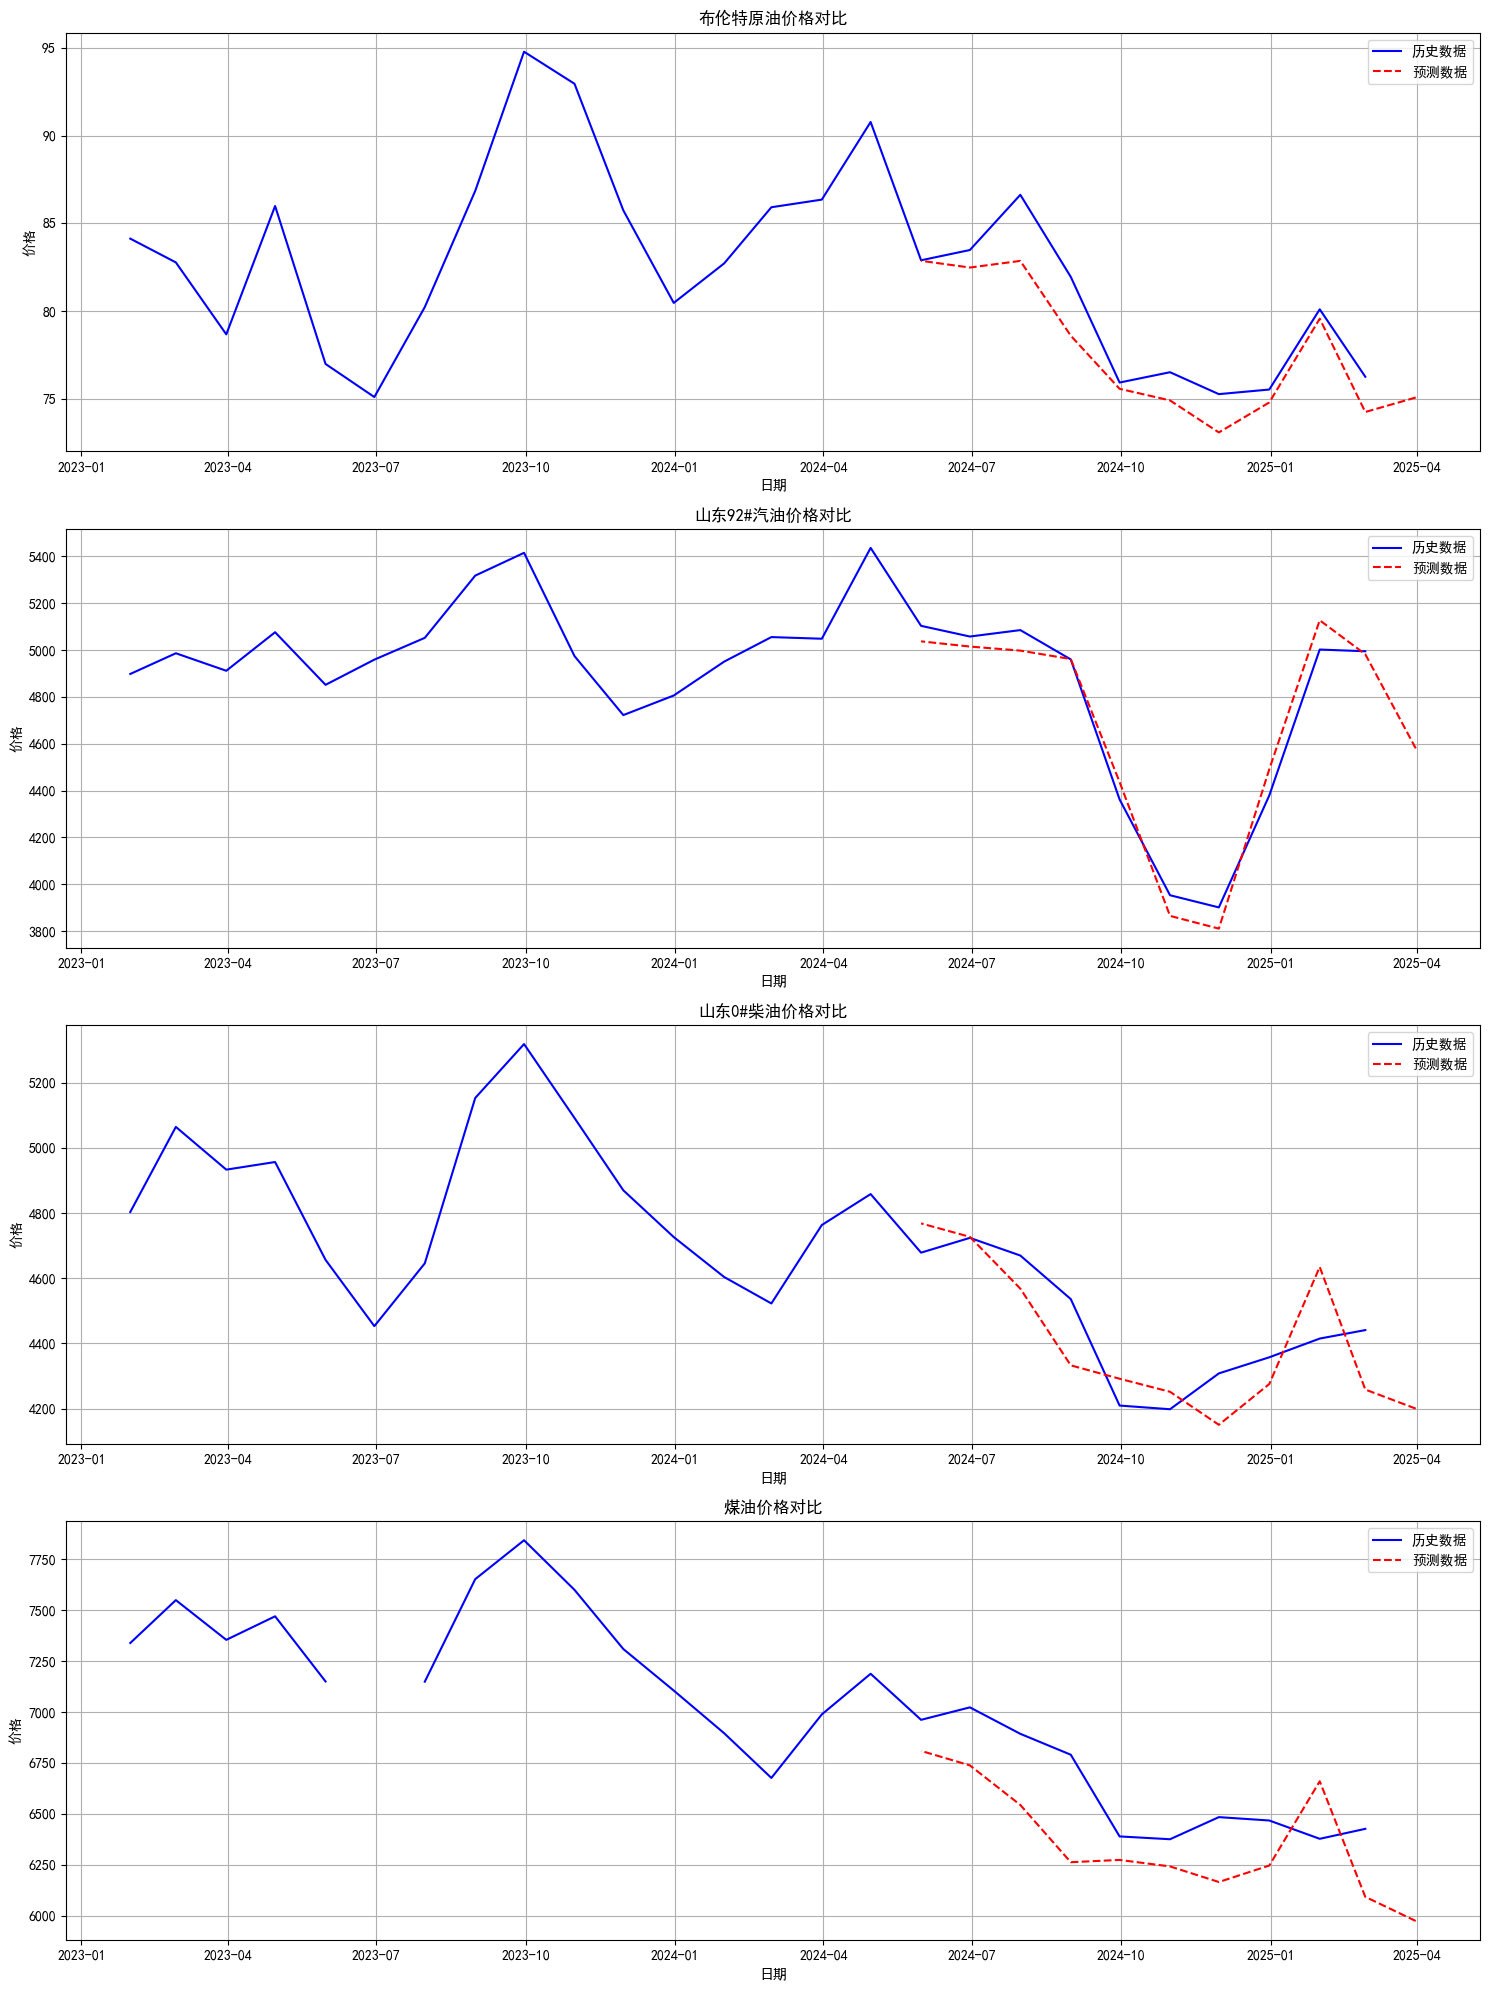

In [16]:
# 创建子图
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 布伦特原油价格对比图
axes[0].plot(historical_monthly['Date'], historical_monthly['布伦特原油现货价格'], 'b-', label='历史数据')
axes[0].plot(pd.to_datetime(merged_forecast['Date']), merged_forecast['Brent原油价格_预测'], 'r--', label='预测数据')
axes[0].set_title('布伦特原油价格对比')
axes[0].set_xlabel('日期')
axes[0].set_ylabel('价格')
axes[0].legend()
axes[0].grid(True)

# 汽油价格对比图
axes[1].plot(historical_monthly['Date'], historical_monthly['山东92#汽油净价'], 'b-', label='历史数据')
axes[1].plot(pd.to_datetime(merged_forecast['Date']), merged_forecast['汽油价格预测'], 'r--', label='预测数据')
axes[1].set_title('山东92#汽油价格对比')
axes[1].set_xlabel('日期')
axes[1].set_ylabel('价格')
axes[1].legend()
axes[1].grid(True)

# 柴油价格对比图
axes[2].plot(historical_monthly['Date'], historical_monthly['山东0#柴油净价'], 'b-', label='历史数据')
axes[2].plot(pd.to_datetime(merged_forecast['Date']), merged_forecast['柴油价格预测'], 'r--', label='预测数据')
axes[2].set_title('山东0#柴油价格对比')
axes[2].set_xlabel('日期')
axes[2].set_ylabel('价格')
axes[2].legend()
axes[2].grid(True)

# 煤油价格对比图
axes[3].plot(historical_monthly['Date'], historical_monthly['煤油：低硫低密度：3#：市场主流价：华东地区：浙江石油化工（日）'], 'b-', label='历史数据')
axes[3].plot(pd.to_datetime(merged_forecast['Date']), merged_forecast['煤油价格预测_市价'], 'r--', label='预测数据')
axes[3].set_title('煤油价格对比')
axes[3].set_xlabel('日期')
axes[3].set_ylabel('价格')
axes[3].legend()
axes[3].grid(True)

plt.tight_layout()
plt.show()
